In [12]:
from nltk.corpus import stopwords  # stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import preprocessor as p
import re
import os
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')
from nltk.stem import WordNetLemmatizer
stop_words = set(nltk.corpus.stopwords.words('english'))


In [3]:
with open('content.txt', 'r') as file:
    content = file.read()
strings= content.splitlines()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(strings)

In [5]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)



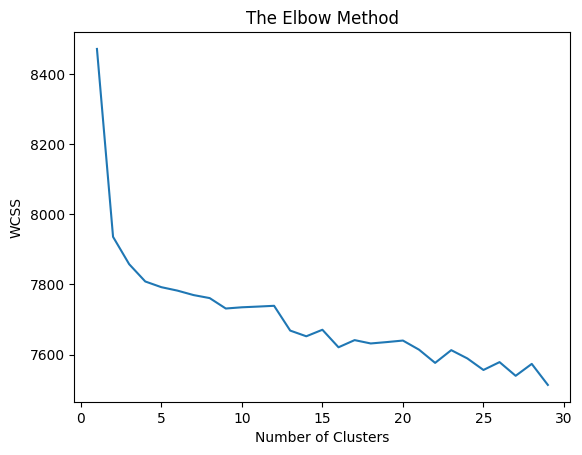

In [6]:
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
clustering_model = KMeans(n_clusters=9, random_state=10)
clustering_model.fit(features)
cluster_assignment = clustering_model.labels_
print(cluster_assignment)


[0 0 0 ... 2 7 7]


In [21]:
clustered_sentences = [[] for i in range(9)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(strings[sentence_id])
    

for i, cluster in enumerate(clustered_sentences):
    print("Cluster "+str(i+1)+": ")
    vect = TfidfVectorizer(stop_words=stop_words, max_features=1000)
    vect_text = vect.fit_transform(cluster)
    lda_model = LatentDirichletAllocation(n_components=10,learning_method='online', random_state=42, max_iter=1)
    lda_top = lda_model.fit_transform(vect_text)
    vocab = vect.get_feature_names()
    for k, comp in enumerate(lda_model.components_):
        vocab_comp = zip(vocab, comp)
        sorted_words = sorted(vocab_comp, key=lambda x: x[1], reverse=True)[:10]
        print("Topic "+str(k)+": ")
        words = []
        for t in sorted_words:
            words.append(t[0])
        print(words)


Cluster 1: 
Topic 0: 
['say', 'fast', 'came', 'much', 'nice', 'call', 'perfect', 'gift', 'also', 'loves']
Topic 1: 
['birthday', 'present', 'everything', 'waiting', 'receipt', 'appreciate', 'okay', 'wants', 'appreciated', 'clear']
Topic 2: 
['good', '10', 'quick', 'buying', 'reviews', 'delivered', 'people', 'keep', 'pleased', 'live']
Topic 3: 
['small', 'review', 'card', 'please', 'wish', 'looks', 'cards', 'packaging', 'activated', 'must']
Topic 4: 
['worked', 'great', 'bear', 'like', 'many', 'etc', 'food', 'used', 'idea', 'want']
Topic 5: 
['simple', 'gc', 'delivery', 'done', 'may', 'ok', 'non', 'confirmation', 'start', 'response']
Topic 6: 
['card', 'email', 'use', 'need', 'well', 'received', 'able', 'easy', 'day', 'one']
Topic 7: 
['thank', 'gift', 'time', 'love', 'amazon', 'happy', 'card', 'service', 'would', 'get']
Topic 8: 
['25', '99', 'regards', 'date', 'restaurant', 'key', 'discount', 'today', 'valid', 'due']
Topic 9: 
['thanks', 'amazon', 'loved', 'use', 'give', 'send', 'chri